In [1]:
# Importation des modules nécessaires
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm

In [2]:
# Charger les fichier Excel avec les donnes de rendements et les poid de chaque actif dans le portefeuille et l'ETF 
df_EAFE = pd.read_excel('/Users/thomasdeconinck/Desktop/Fonds BNI/Fonds BNI Selection de Gestionnaire/Time Series/EAFE/Returns EAFE PORT Vs MSCI Index.xlsx', skiprows=4)

df_EM = pd.read_excel('/Users/thomasdeconinck/Desktop/Fonds BNI/Fonds BNI Selection de Gestionnaire/Time Series/EM/Returns BNI Vs MSCI EM Index.xlsx', skiprows=4)

                             OLS Regression Results                             
Dep. Variable:     Portfolio Return (X)   R-squared:                       0.858
Model:                              OLS   Adj. R-squared:                  0.856
Method:                   Least Squares   F-statistic:                     429.3
Date:                  Sun, 06 Oct 2024   Prob (F-statistic):           8.04e-32
Time:                          01:49:13   Log-Likelihood:                -147.16
No. Observations:                    73   AIC:                             298.3
Df Residuals:                        71   BIC:                             302.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const     

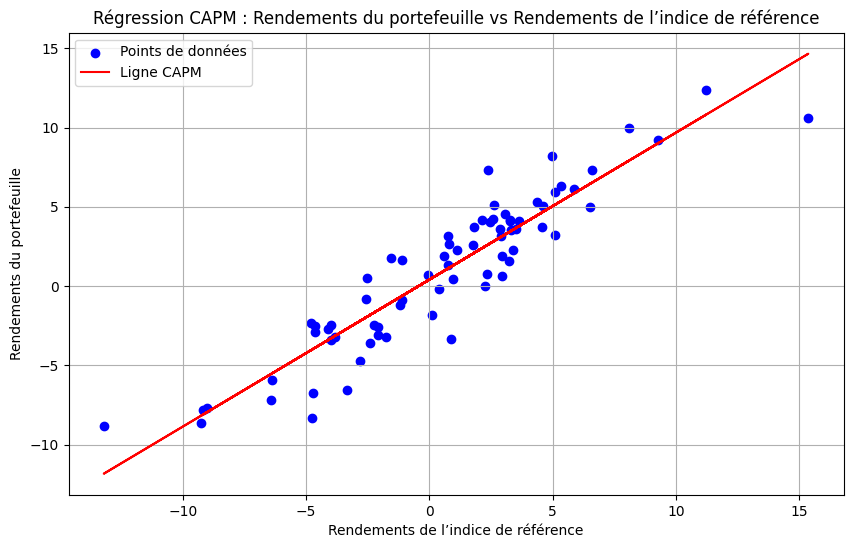

Alpha de Jensen: 0.413484746347729
                             OLS Regression Results                             
Dep. Variable:     Portfolio Return (X)   R-squared:                       0.948
Model:                              OLS   Adj. R-squared:                  0.947
Method:                   Least Squares   F-statistic:                     863.8
Date:                  Sun, 06 Oct 2024   Prob (F-statistic):           6.65e-32
Time:                          01:49:13   Log-Likelihood:                -74.313
No. Observations:                    49   AIC:                             152.6
Df Residuals:                        47   BIC:                             156.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

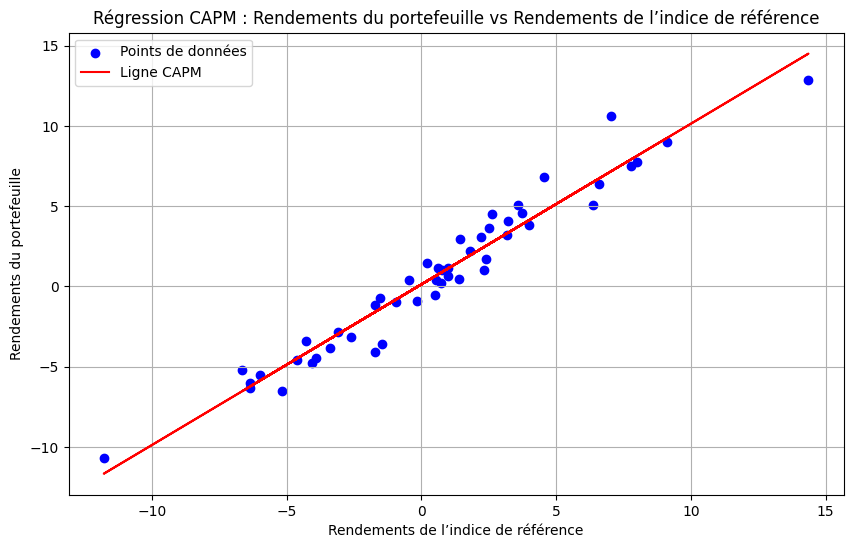

Alpha de Jensen: 0.135708885790476


In [3]:
def calculate_and_plot_CAPM(df, portfolio_return_col, index_return_col, window=12):
    # Calculer la différence des rendements entre le portefeuille et l'indice de référence
    df['Difference Returns'] = df[portfolio_return_col] - df[index_return_col]

    # Calculer la variance des différences des rendements
    df['Tracking Error'] = df['Difference Returns'].rolling(window=window).std(ddof=1)

    # Préparer les données pour la régression
    X = df[index_return_col]  # Variable indépendante
    y = df[portfolio_return_col]  # Variable dépendante

    # Ajouter une constante pour le terme d'interception
    X = sm.add_constant(X)

    # Effectuer la régression linéaire
    model = sm.OLS(y, X).fit()

    # Afficher le résumé de la régression
    print(model.summary())

# Tracer les résultats de la régression
    plt.figure(figsize=(10, 6))
    plt.scatter(df[index_return_col], df[portfolio_return_col], color='blue', label='Points de données')
    plt.plot(df[index_return_col], model.predict(X), color='red', label='Ligne CAPM')
    plt.xlabel('Rendements de l’indice de référence')
    plt.ylabel('Rendements du portefeuille')
    plt.title('Régression CAPM : Rendements du portefeuille vs Rendements de l’indice de référence')
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculer l'alpha de Jensen
    alpha_jensen = model.params['const']
    print(f"Alpha de Jensen: {alpha_jensen}")

    return alpha_jensen

# Calculer et tracer pour df_EAFE
alpha_jensen_EAFE = calculate_and_plot_CAPM(df_EAFE, 'Portfolio Return (X)', 'iShares MSCI EAFE ETF')

# Calculer et tracer pour df_EM
alpha_jensen_EM = calculate_and_plot_CAPM(df_EM, 'Portfolio Return (X)', 'iShares MSCI Emerging Markets ETF')